In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load data
exoplanets = pd.read_csv("PSCompPars_2023.02.26_02.19.30.csv", sep=",")
exoplanets

,discoverymethod,disc_year
0,Radial Velocity,2007
1,Radial Velocity,2009
2,Radial Velocity,2008
3,Radial Velocity,2002
4,Radial Velocity,1996
...,...,...
5267,Radial Velocity,1996
5268,Radial Velocity,1999
5269,Radial Velocity,1999
5270,Radial Velocity,2021


In [16]:
#list of discovery types
x = np.array(exoplanets["discoverymethod"])
discovery_types = np.unique(x)
discovery_types

array(['Astrometry', 'Disk Kinematics', 'Eclipse Timing Variations',
       'Imaging', 'Microlensing', 'Orbital Brightness Modulation',
       'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity',
       'Transit', 'Transit Timing Variations'], dtype=object)

In [17]:
#list of years
year_start = min(exoplanets["disc_year"])
year_end = max(exoplanets["disc_year"])
print(year_start, " - ", year_end)


1992  -  2023


In [18]:
#make array of years and types
exoplanets_years = pd.DataFrame()
for year in range(year_start, year_end+1):
    discovery_type_list = []
    for index, discovery_type in enumerate(discovery_types):
        numPlanets = 0
        if year > year_start:
            #numplanets is the cumulative total
            numPlanets = exoplanets_years.at[index, year-1]
        numPlanets += pd.Series.sum((exoplanets['disc_year'] == year) & (exoplanets['discoverymethod'] == discovery_type))
        discovery_type_list.append(numPlanets)
    exoplanets_years[year] = discovery_type_list
exoplanets_years.insert(0, "Discovery Type", discovery_types)

exoplanets_years

,Discovery Type,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Astrometry,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
1,Disk Kinematics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
2,Eclipse Timing Variations,0,0,0,0,0,0,0,0,0,...,9,10,10,12,13,15,15,15,17,17
3,Imaging,0,0,0,0,0,0,0,0,0,...,35,40,42,43,44,48,50,58,62,62
4,Microlensing,0,0,0,0,0,0,0,0,0,...,31,35,45,54,75,89,109,130,169,176
5,Orbital Brightness Modulation,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,9,9,9
6,Pulsar Timing,2,2,3,3,3,3,3,3,3,...,5,5,5,7,7,7,7,7,7,7
7,Pulsation Timing Variations,0,0,0,0,0,0,0,0,0,...,1,1,2,2,2,2,2,2,2,2
8,Radial Velocity,0,0,0,1,7,8,14,27,43,...,524,571,621,670,719,785,830,908,1024,1027
9,Transit,0,0,0,0,0,0,0,0,0,...,1162,1262,2715,2804,3057,3170,3336,3751,3939,3945


In [19]:
exoplanets_years.to_csv(index=False)

'Discovery Type,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023\nAstrometry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2\nDisk Kinematics,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1\nEclipse Timing Variations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,8,9,9,9,10,10,12,13,15,15,15,17,17\nImaging,0,0,0,0,0,0,0,0,0,0,0,0,3,4,8,9,16,16,22,24,26,33,35,40,42,43,44,48,50,58,62,62\nMicrolensing,0,0,0,0,0,0,0,0,0,0,0,0,1,3,4,4,8,10,12,13,20,25,31,35,45,54,75,89,109,130,169,176\nOrbital Brightness Modulation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,3,6,6,6,6,6,6,6,9,9,9\nPulsar Timing,2,2,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,7,7,7,7,7,7,7\nPulsation Timing Variations,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2\nRadial Velocity,0,0,0,1,7,8,14,27,43,55,83,104,122,155,176,210,247,320,361,408,442,474,524,571,621,670,719,785,83

In [20]:
exoplanets_years.to_csv(path_or_buf="exoplanets_years.csv",index=False)

#ou avec un with qui permet la cloture automatique

with open('exoplanets_years.csv', 'w') as csv_file:
    df.to_csv(path_or_buf=csv_file,index=False)

In [21]:
#use flourish to visualize lthe dynamic by year : https://app.flourish.studio/visualisation/12875156/edit?

In [22]:
exoplanets_years[2022]

0        2
1        1
2       17
3       62
4      169
5        9
6        7
7        2
8     1024
9     3939
10      24
Name: 2022, dtype: int64

In [23]:
exoplanets_years.shape[0] #nombre de lignes

11

In [24]:
exoplanets_years.shape[1] #nombre de colonnes

33

In [25]:
exoplanets_years.shape

(11, 33)

In [26]:
#graphics

<AxesSubplot: >

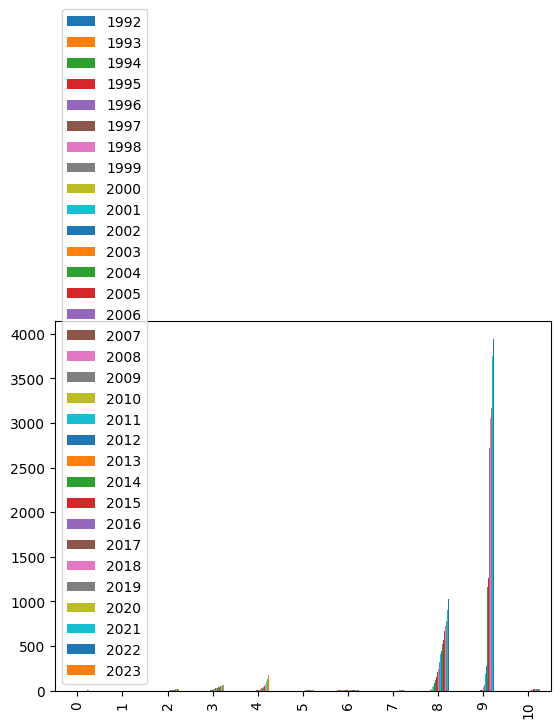

In [37]:
exoplanets_years.plot(kind='bar')

In [51]:
df_2020_2023 = exoplanets_years[["Discovery Type",2020,2021,2022,2023]]

In [52]:
df_2020_2023

,Discovery Type,2020,2021,2022,2023
0,Astrometry,1,1,2,2
1,Disk Kinematics,1,1,1,1
2,Eclipse Timing Variations,15,15,17,17
3,Imaging,50,58,62,62
4,Microlensing,109,130,169,176
5,Orbital Brightness Modulation,6,9,9,9
6,Pulsar Timing,7,7,7,7
7,Pulsation Timing Variations,2,2,2,2
8,Radial Velocity,830,908,1024,1027
9,Transit,3336,3751,3939,3945


<AxesSubplot: >

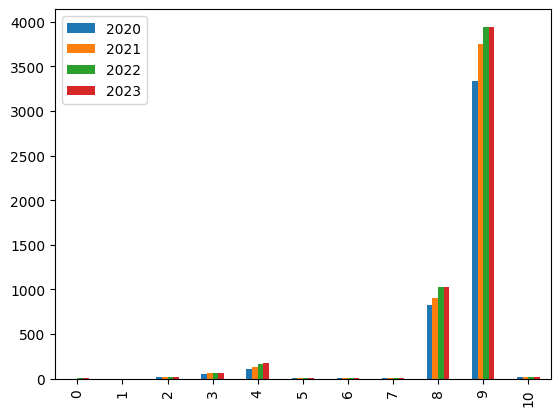

In [57]:
df_2020_2023.plot(kind='bar')

In [59]:
df_2020_2023noi = exoplanets_years[["Discovery Type",2020,2021,2022,2023]]

In [60]:
df_2020_2023noi

,Discovery Type,2020,2021,2022,2023
0,Astrometry,1,1,2,2
1,Disk Kinematics,1,1,1,1
2,Eclipse Timing Variations,15,15,17,17
3,Imaging,50,58,62,62
4,Microlensing,109,130,169,176
5,Orbital Brightness Modulation,6,9,9,9
6,Pulsar Timing,7,7,7,7
7,Pulsation Timing Variations,2,2,2,2
8,Radial Velocity,830,908,1024,1027
9,Transit,3336,3751,3939,3945


In [62]:
df_2020_2023noi.set_index("Discovery Type")

,2020,2021,2022,2023
Discovery Type,,,,
Astrometry,1,1,2,2
Disk Kinematics,1,1,1,1
Eclipse Timing Variations,15,15,17,17
Imaging,50,58,62,62
Microlensing,109,130,169,176
Orbital Brightness Modulation,6,9,9,9
Pulsar Timing,7,7,7,7
Pulsation Timing Variations,2,2,2,2
Radial Velocity,830,908,1024,1027


<AxesSubplot: title={'center': 'planetes'}, xlabel='Discovery Type'>

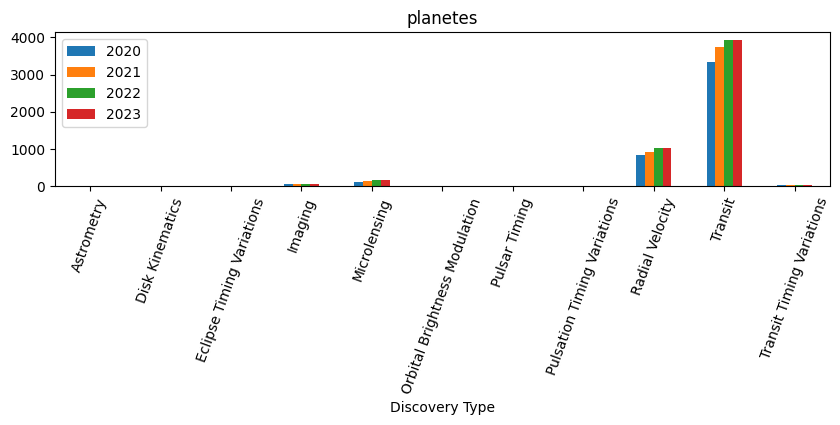

In [79]:
df_2020_2023noi.set_index("Discovery Type").plot.bar(rot=70, title="planetes", figsize=(10,2))